# ¿Cómo graficar sólo un subgrupo del conjunto de datos?
Antes que nada necesitamos saber qué datos nos interesan, es decir el subconjunto. Para eso es bueno tener un vistazo del dataframe.

In [25]:
import pandas as pd
import seaborn as sns

# Abrimos el archivo, especificando la ruta y usando pd.read_csv()
# Los dos puntos iniciales son para ir una carpeta arriba 
synergyFile = '../data/synergy_logistics_database.csv'
synergyDataFrame = pd.read_csv(synergyFile, index_col='register_id')
# Vemos los resultados
synergyDataFrame.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


Vamos a ver la cantidad de valores únicos que tiene la columna `transport_mode`. Hay varias formas de hacerla, una de las formas más sencillas son las siguientes:

In [26]:
# Estructura df.colname.funcion()
synergyDataFrame.transport_mode.unique()

array(['Sea', 'Air', 'Rail', 'Road'], dtype=object)

Podemos comenzar a agrupar por `transport_mode`, para este ejercicio vamos a sacar cuenta de cuantos envíos hay por categoría

In [27]:
# type(synergyDataFrame['transport_mode'].value_counts())
# synergyDataFrame['transport_mode'].value_counts()
transp_mode_count = synergyDataFrame['transport_mode'].value_counts()

<AxesSubplot:>

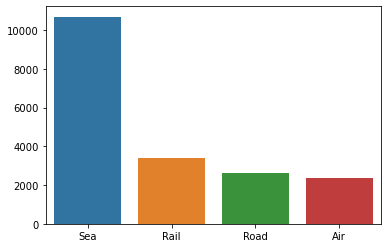

In [28]:
sns.barplot(x=transp_mode_count.index, y=transp_mode_count.values)

Para algo más interesante grafiquemos ahora la ganancia promedio de estas categorías de transporte

In [29]:
# Agrupamos por medio de transporte, nos interesa luego el promedio del valor total de cada envío
# type(synergyDataFrame.groupby('transport_mode')['total_value'].mean())
# synergyDataFrame.groupby('transport_mode')['total_value'].mean()
prom_val_transp = synergyDataFrame.groupby('transport_mode')['total_value'].mean()

<AxesSubplot:xlabel='transport_mode'>

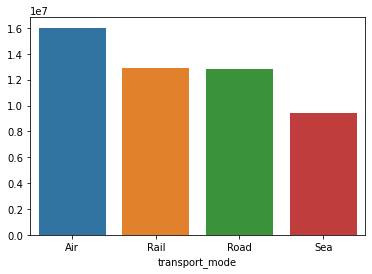

In [30]:
sns.barplot(x=prom_val_transp.index, y=prom_val_transp.values)

Vamos a agrupar ahora por mes

In [31]:
synergyDataFrame['date'] = pd.to_datetime(synergyDataFrame['date'], format="%d/%m/%y")
synergyDataFrame.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000


In [32]:
synergyDataFrame['mes'] = synergyDataFrame['date'].dt.month
synergyDataFrame.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,mes
register_id,,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000,1
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000,2
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000,2
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000,2
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000,2


In [36]:
mes_count = synergyDataFrame['mes'].value_counts()

<AxesSubplot:>

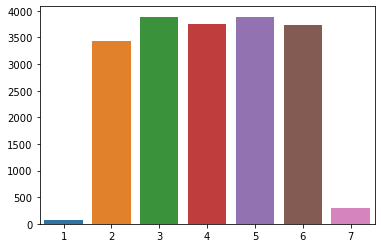

In [37]:
sns.barplot(x=mes_count.index, y=mes_count.values)

<AxesSubplot:xlabel='mes'>

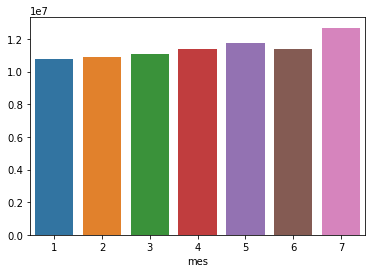

In [38]:
prom_val_mes = synergyDataFrame.groupby('mes')['total_value'].mean()
sns.barplot(x=prom_val_mes.index, y=prom_val_mes.values)